# **What is One-Period Binomial Pricing Model?**

---
### **One-period Binomial Pricing Model** is one of the simplest financial  model to understand. A brief discription about this is given below:

*   We call the beginning of the period time zero and the end of the period time one At time zero, we have a stock whose price per share we denote by `S0`, a positive quantity known at time zero
*   At time one, the price per share of this stock will be one of two
positive values, which we denote `S1(H) and S1(T)`, the H and T standing
for head and tail, respectively
*   Thus, we are imagining that a coin is tossed, and the outcome of the coin toss determines the price at time one. We do not assume this coin is fair (i.e., the probability of hea.d need not be one-half)
*   We assume only that the probability of head, which we call `p`, is positive, and the probability of tail, which is `q = 1 - p`, is also positive
*  u is the up-factor and d is the down-factor 
*  We also introduce interest rate` r`.  One dollar invested in the money
market at time zero will yield `1 + r `dollars at time one. And we are assuming that the rate of borrowing is same as the rate of investing

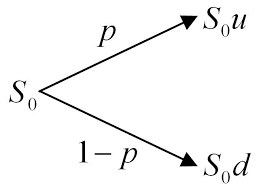


<br><br>



### **Arbitrage Model**
An essential feature of an efficient market is that if a trading strategy can
turn nothing into something, then it must also run the risk of loss. Otherwise,
there would be an arbitrage. <br>
More specifically, we define arbitrage as a trading
strategy that begiis with no money, has zero probability of losing money,
and has a positive probability of making money.
<br>

### **`0 < d < 1 + r < u`**
This is very important to hold the condition that the trading strategy does not lead to an arbitrage

Let's try to derive this eqaution bit-by-bit.


*   **`d < 0`**, this is not possible by considering the fact that the stock price needs to be positive
*   **`1 + r < d`**, one could begin with zero wealth and at time zero borrow from the money market in order to buy stock. Even in the worst case of a tail on the coin toss, the stock at time one will be worth enough to pay off the money market debt . Thus providing an arbitrage
*   **`u < 1 + r`**, one could sell the stock short and invest the
proceeds in the money market. Even in the best case for the stock, the cost of
replacing it at time one will be less than or equal to the value of the money
market investment. Thus again providing an arbitrage

We have argued in the previously that if there is to be no arbitrage in the market with the stock and the money market account, then we
must have **`0 < d < 1 + r < u`**. The converse of this is also true, if the previous condition holds, then there is no arbitrage.

<br><br>





### **Does the actual market scenario looks this simple?**
Of course, stock price movements are much more complicated than indicated by the binomial asset-pricing model. We consider this simple model for
three reasons. 

*   First of all, within this model, the concept of [arbitrage pricing](https://g.co/kgs/uYLfWy) and its relation to [risk-neutral pricing](https://g.co/kgs/R2XhQE) is clearly illuminated.
*   Secondly, the model is used in practice because, with a sufficient number of periods, it provides a reasonably good, computationally tractable approximation to continuous-time models. 
*   Finally, within the binomial asset-pricing model, we can develop the theory of conditional expectations and martingales, which lies
at the heart of continuous-time models.

<br>

###**Different Dervatives**


*   **European Call Option** which confers on its owner
the right but not the obligation to buy one share of the stock at time one for
the strike price K


1.   Let's assume that `S1(T) < K < S1(H)`, if we get a tail on the toss, then the option is not exercised, but if we get a head then option is exercised and we get a profit of `S1(H) - K`.
2.   Therefore we say that this option is worth `(S1(H) - K )+` which basically means `max(0,S1 - K)`

The fundamental question of option pricing is how much the **option is
worth** at time zero before we know whether the coin toss results in head or
tail. 

Different types of options available:
*  [Call Option](https://www.investopedia.com/terms/c/calloption.asp)
*  [Put Option](https://www.investopedia.com/terms/p/putoption.asp)
*  [Forward Option](https://www.investopedia.com/terms/f/forwardcontract.asp#:~:text=What%20Is%20a%20Forward%20Contract,it%20particularly%20apt%20for%20hedging.)

**The arbitrage pricing theory approach to the option-pricing problem is to
replicate the option by trading in the stock and money markets**
<br><br>

###**Example to understand how we replicate options in stock and money markets**


In [1]:
def Calculate_S1H(initial_price : int, up_factor : int):
  print("The Up-Factor Price or the S1(H) is :", initial_price*up_factor,'\n')
  return initial_price*up_factor

def Calculate_S1T(initial_price : int, down_factor : int):
  print("The Down-Factor Price or the S1(T) is :", initial_price*down_factor,'\n')
  return initial_price*down_factor

def Calculate_cash_position_at_time_one(initial_net_position: int, interest_rate: int):
  print("Cash Position at time one: ",initial_net_position*(1 + interest_rate),'\n')
  return initial_net_position*(1 + interest_rate)

def Model1(initial_wealth: int,initial_stock_price: int, no_of_shares: int, up_factor: int,interest_rate: int, strike_price: int):
  ## Down Factor is usually 1 / Up-Factor

  total_cash_required = no_of_shares * initial_stock_price 
  net_position = initial_wealth - total_cash_required

  print("Total Cash Required: ",total_cash_required,'\n') 
  print("Total Cash Initially:", initial_wealth,'\n')
  print("Net Cash Required:",net_position,'\n')

  net_position_at_time_one = Calculate_cash_position_at_time_one(net_position,interest_rate)
  S1H = Calculate_S1H(initial_stock_price,up_factor)
  S1T = Calculate_S1T(initial_stock_price, 1 / up_factor)

  net_position_at_time_one_head = no_of_shares * S1H + net_position_at_time_one
  net_position_at_time_one_tail = no_of_shares * S1T + net_position_at_time_one

  print("Net Position at time one (H):", net_position_at_time_one_head,'\n')
  print("Net Position at time one (T):", net_position_at_time_one_tail,'\n')


  print("Now consider a long position on a call option with a strike price of: ",strike_price,'\n')
  print("If the stock goes up, the option will be exercised,net position in that case: ",max(0,int(S1H) - strike_price),'\n')
  print("If the stock goes down, the option will be not be exercised,net position in that case: ",max(0,int(S1T) - strike_price))


In [2]:
initial_wealth = 1.2
initial_stock_price = 4
no_of_shares = 0.5
up_factor = 2
interest_rate = 0.25
strike_price = 5

In [ ]:
Model1(initial_wealth, initial_stock_price, no_of_shares, up_factor, interest_rate, strike_price)

###**Thus in both the condition, the gain / losses are the same, hence this how we replicate a option in terms of money and stock market.**

The **`initial weath`** (in this case 1.2), which is been `required to set up the option`, is call the**`no-arbitrage price`** of the option.

<br>

Why is this called **no-arbitrage price** of the option ?
Let's consider two cases when the price of the option is 1.21  and 1.19,
* Let's consider the case when one is able to sell the option at 1.21, one can replicate the whole option in the market by just using 1.20 and invest the rest 0.01 in the money market, at time one, the seller of the option regardless of how stock performs will be able to pay-off the option

* Let's consider that we are able to buy a option for 1.19, in this case we can purely reverse our strategy, we can first short sell lhalf the stock, get 2. Now we can buy the option at 1.19, and invest 0.8 in money market and left 0.01 in some another money market. At time one, if the stock coin toss results in head, we need 4 to replace the stock, we will get 3 from the option and 0.08 invested in time zero will become 1.0 at time one, and thus we will be able to pay off, and still left with 0.01 invested in market at time. 

Thus both of these gives us a cleaar understanding that for no arbitrage to exist, the price of the option should be 1.2 and thus called **`no-arbitrage pricing`**

<br>

The argument in the example above depends on several assumptions. The
principal ones are:
* Shares of stock can be subdivided for sale or purchase,
* The interest rate for investing is the same as the interest rate for borrowing,
* The purchase price of stock is the same as the selling price (i.e., there is
zero bid-ask spread),
* At any time, the stock can take only two possible values in the next period.


### **Option Pricing in Share Market**


Let's now dive into the mathematics of figuring out, how we can know the option value at time zero, how much shares we need to replicate the option in share market?

This a somewhat mathematics heavy and would ask to work on this with a pen and pencil

* In the general one period binomial model, we define a derivative security to be a security that pays some amount **`V1(H)`** if the coin toss results in a head, and **`V1(T)`** if the coin toss results in a tail
* To determine the price **`V0`** of the option at time zero, let's consider we need to buy **`N`**number of shares at a price of **`S0`** and we are begining with a initial wealth of **`X0`**.
* This gives us a initial net poistion of **`X0 - N*S0`**, 
* Value of the postfolio of stock and money market at time one would be **`N*S1 + (1 + r)*(X0 - N*S0)`** which can be rearranged into **`(1 + r)*X0 + N*(S1  - (1 + r)*S0`**
* We need to choose **`N`** and **`X0`** such that **`X1(H) = V1(H)`** and **`X1(T) = V1(T)`**
* Two equation which we reailize is  **`(1 + r)*X0 + N*(S1(H)  - (1 + r)*S0 = V1(H)`** and **`(1 + r)*X0 + N*(S1(T)  - (1 + r)*S0 = V1(T)`**
* Both of the equation above can be rearranged like **`X0 + N*(S1(H)/(1+r)  - S0) = V1(H)/(1+r)`** and **`X0 + N*(S1(T) /(1+r) - S0) = V1(T)/(1+r)`**

<br>

One wat to solve both of these equation is to multiply first equation with **`a`** and second equation with **`b = 1 - a`** and add both the equation
* Final equation which comes out ot be is **`X0 + N * ( (S1(H)*a + S1(T)*b) / (1+r) - S0) = (a*V1(H) + b*V1(T) / (1 + r))`** 
* if we choose **`a`** such that **`S0 = (S1(H)*a + S1(T)*b) / (1+r)`** , then we have a direct equation for **`X0 = (a*V1(H) + b*V1(T)) / (1 + r)`** 
* If we simplify our assumption of **`S0 = (S1(H)*a + S1(T)*b) / (1+r)`**, such that **`S0 = (S0*u*a + S0*d*(1-a)) / (1+r)`** which will lead us to **`1 + r = d + a(u - d)`**  and therefore **`a = (1 + r - d )/(u - d)`**
* **`b = 1 - a`**, therefore **`b = (u - 1 - r)/(u - d)`**
* We can solve for **`N`**, buy substracting the two equation which we derived **`(1 + r)*X0 + N*(S1(H)  - (1 + r)*S0 = V1(H)`** and **`(1 + r)*X0 + N*(S1(T)  - (1 + r)*S0 = V1(T)`**
* Which leads us to **`N = V1(H) - V1(T) / (S1(H) - S1(T))`**  

Thus if a agent buys **`N`** shares at time zero and has a wealth of **`X0`**, then at time one if the coin toss results in head then we will have a postfolio worth **`V1(H)`** and if the coin toss results in tail then we will have a portfolio worh **`V1(T)`**

The agent has now hedged a **short position in a derivative security**

* This derivative security which pays **`V1`** at time one, should be priced at **`V0 = (a*V1(H) + b*V1(T))/(1 + r)`**

<br>

In this above thing we have developed a model for hedging a short position, similarily we can do to hedge for a long position, in that case the number of stock we need to sell short is the negative of the number of the shares we finded above

* **`a`** and **`b`** in here, are both positive and due to no-arbitrage condition they sum to one, and therefore somtimes we regard them as probabilities of head and tail, they are not the acutal probabilities we discussed before, rather they are call risk-neutral probabilities
* Also, under the actual probabilities, the average rate of growth of the
stock is typically strictly greater than the rate of growth of an investment in
the money market; otherwise, no one would want to incur the risk associated
with investing in the stock.
* Therefore, **`S0 < (p*S1(H) + q*S1(T))/(1+r)`** compared to **`S0 = (a*S1(H) + b*S1(T))/(1+r)`** as we already determined
* They assist us by making the term multiplying the
unknown L\o drop out. 
* In fact, because they are chosen to make the mean rate of growth of the stock appear to equal the rate of growth of the money market account, they make the mean rate of growth of any portfolio of stock and money market account appear to equal the rate of growth of the money market asset.
* The concluding equation **`V0 = (a*V1(H) + b*V1(T))/(1 + r)`** for the time-zero price **`V0`** of the derivative security **`V1`** is called the **risk-neutral pricing formula** for the one-period binomial model.
*  One should not be concerned that the actual probabilities
do not appear in this equation. We have constructed a hedge for a short position in the derivative security, and this hedge works regardless of whether
the stock goes up or down. The probabilities of the up and down moves are
irrelevant. 
* What matters is the size of the two possible moves (the values of
u and d). In the binomial model, the prices of derivative securities depend
on the set of possible stock price paths but not on how probable these paths
are. 

<br>

### Now, lets try to make a model stimulating all the mathematics above


In [21]:
def Model2(V1H: int, V1T: int, initial_stock_price: int, up_factor: int, interest_rate : int):
  down_factor = 1 / up_factor
  S1H = Calculate_S1H(initial_stock_price,up_factor)
  S1T = Calculate_S1T(initial_stock_price,down_factor)

  ### Formulae for number of shares
  N = (V1H - V1T)/(S1H - S1T)
  print("No. of shares we need: ", N,'\n')

  a = (1 + interest_rate - down_factor)/(up_factor - down_factor)
  b = (up_factor - 1 - interest_rate)/(up_factor - down_factor)
  print("The Risk Neutral Probabilites are a:",a, "and b: ",b,'\n')

  Risk_Neutral_Pricing = (a*V1H + b*V1T) / (1 + interest_rate)
  print("Risk_Neutral_Pricing of the option: ",Risk_Neutral_Pricing,'\n')

  ### Risk_Neutral_Price of the option is similar to the inital wealth which is required


In [22]:
V1H = 3
V1T = 0
initial_stock_price = 4
up_factor = 2
interest_rate = 0.25

In [ ]:
Model2(V1H,V1T,initial_stock_price,up_factor,interest_rate)